Number of entries:  3048


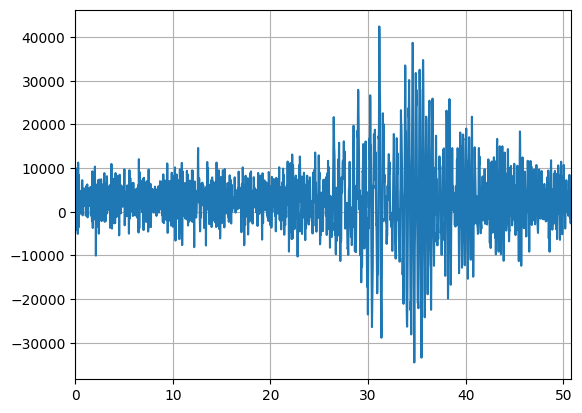

In [31]:
import numpy as np
import matplotlib.pyplot as plt
file_path = "kobe.txt"

with open(file_path, "r") as file:
    entries = [float(entry) for entry in file.readlines()]

number_of_entries = len(entries)
t = np.linspace(0, len(entries), len(entries))

plt.plot(t, entries)

# Set the desired tick locations and labels
tick_locations = [0, 60*10, 60*20, 60*30, 60*40, 60*50]
tick_labels = ['0', '10', '20', '30', '40', '50']

plt.xticks(tick_locations, tick_labels)
plt.xlim(0, len(entries))

print("Number of entries: ", number_of_entries)
plt.grid()
plt.savefig("Ex 5a.1.png")
plt.show()


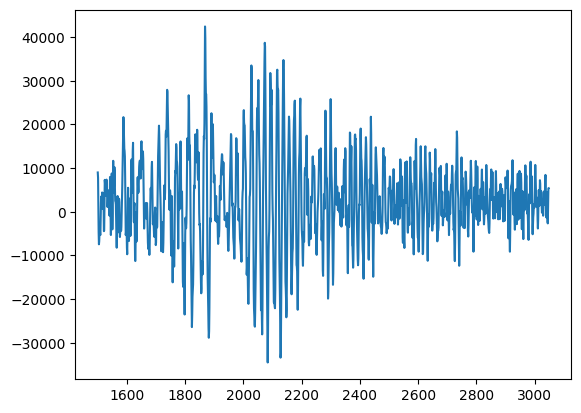

In [21]:
initial_time = 1500
t_window = np.linspace(initial_time, number_of_entries, len(entries[initial_time:]))

plt.plot(t_window, entries[initial_time:])

0.9996719160104987


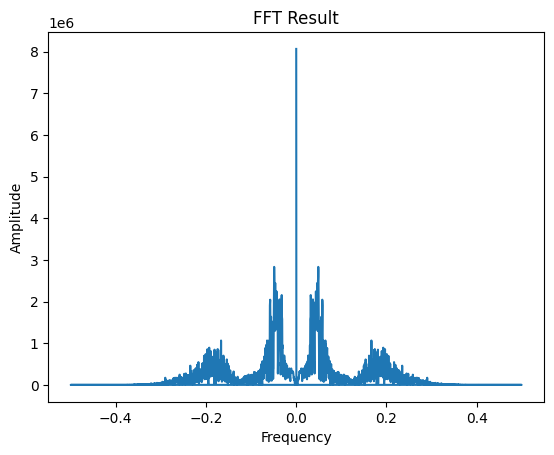

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Perform FFT
fft_result = np.fft.fft(entries)

# Calculate the frequency axis
sampling_rate = 1 / (t[1] - t[0])
print(sampling_rate)
frequencies = np.fft.fftfreq(len(entries), d=1/sampling_rate)

# Plot the FFT result
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT Result')
plt.savefig("Ex 5a.2.png")
plt.show()


In [23]:

window_size = 100
window = np.zeros(len(entries))

for m in range(1650, len(entries)-100):
    initial_time = m
    window[initial_time:window_size+initial_time] = 1

    # Apply the window
    windowed_signal = entries[initial_time:window_size+initial_time]

    # Perform FFT
    fft_result_windowed = np.fft.fft(windowed_signal)
    frequencies = np.fft.fftfreq(len(fft_result_windowed), d=1/sampling_rate)

    # Plot the FFT result
    plt.plot(frequencies, np.abs(fft_result_windowed))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title('FFT Result (Windowed) {m}'.format(m=m))
    plt.savefig("images/{m}.png".format(m=m))
    plt.clf()

print(m)

2947


<Figure size 640x480 with 0 Axes>

In [24]:
import imageio
import os

# Directory containing the images
image_dir = "images/"

# Get the list of image files
image_files = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(".png")])

# Create a list to store the images
images = []

# Read each image file and append it to the list
for file in image_files:
    images.append(imageio.imread(file))

# Output GIF file path
output_file = "output.gif"

# Save the images as a GIF
imageio.mimsave(output_file, images, duration=0.2)


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_73906/385559690.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


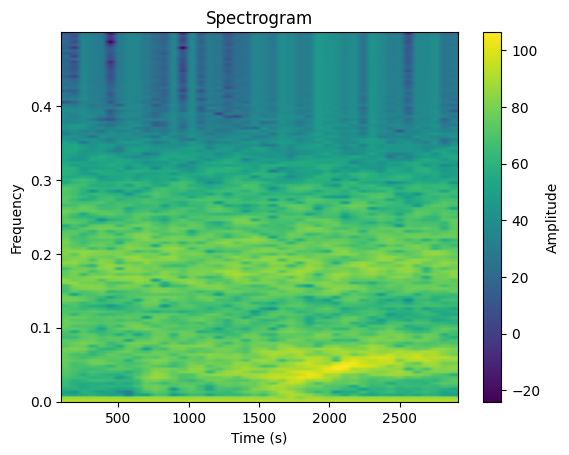

In [39]:
# Define the parameters for the spectrogram
nfft = 256  # Number of FFT points
window = np.hamming(nfft)  # Window function
overlap = int(nfft * 0.75)  # Overlap between consecutive segments

# Compute the spectrogram
frequencies, times, spectrogram, im = plt.specgram(entries, NFFT=nfft, Fs=sampling_rate, window=window, noverlap=overlap)

# Plot the spectrogram
plt.xlabel('Time (s)')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(label='Amplitude')
plt.savefig("Ex 5c.png")
plt.show()